In [1]:
import petroeval as pet
import petroeval.pseudomodes as pds
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('leaderboard_test_features.csv.txt', sep=';')

In [3]:
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN


In [4]:
# using the DataHandlers class to process the dataframe and set the curve headers
# the default FORCE headers are used so no manual setting is done. The set_mnemonics
#arguments should be set to correspond to the headers present in the log data

new_df = pds.DataHandlers(df)
df1 = new_df.set_mnemonics()

In [5]:
df1.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,NPHI,PEF,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RMIC
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,0.551575,55.815659,174.347092,35.525719,NaN,96.461990,NaN,-0.538873,0.130611,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,0.547566,41.862537,176.112915,36.158520,NaN,96.454399,NaN,-0.539232,0.130611,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,0.551840,38.587872,177.662476,36.873703,NaN,96.446686,NaN,-0.540830,0.130611,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,0.552511,41.417999,177.437714,37.304054,NaN,161.170166,NaN,-0.543943,0.130611,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,0.566789,49.471237,176.797653,37.864922,NaN,172.489120,NaN,-0.542104,0.130611,NaN


Columns which were not used in creating the pretrained models have been dropped from the dataframe;
reason for the decrease in column size from 27 to 23

In [6]:
facies = pds.PredictLabels(df=df1, depth_col='DEPTH_MD')

In [7]:
# using the pretrained FORCE model on the well data for prediction

predictions = facies.predict(model=False)  #no model is passed, so the pretrained models are used

Shape of dataframe before augmentation: (136786, 22)
Augmenting features...
Shape of dataframe after augmentation: (136786, 88)
Model 1, predicting...
Model 2, predicting...
Predictions complete!


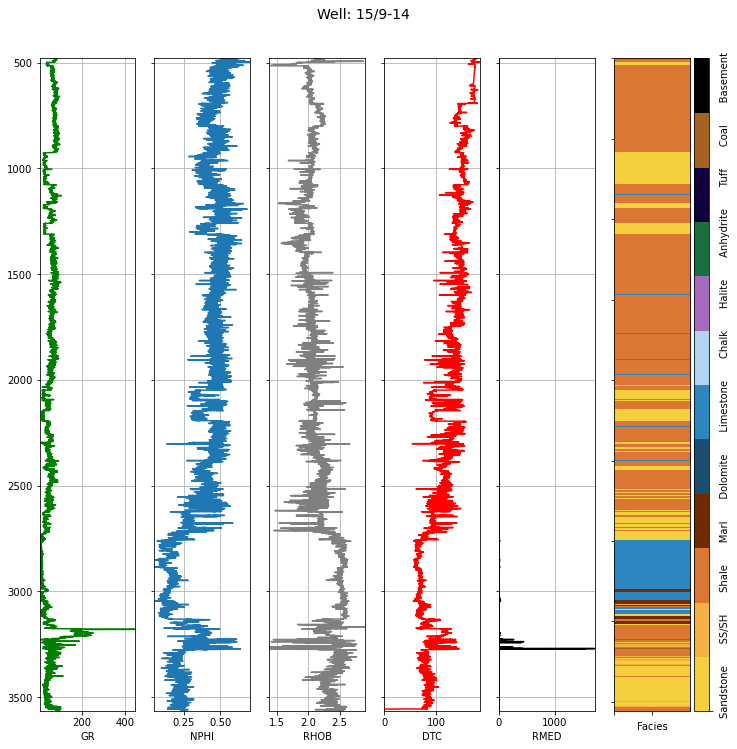

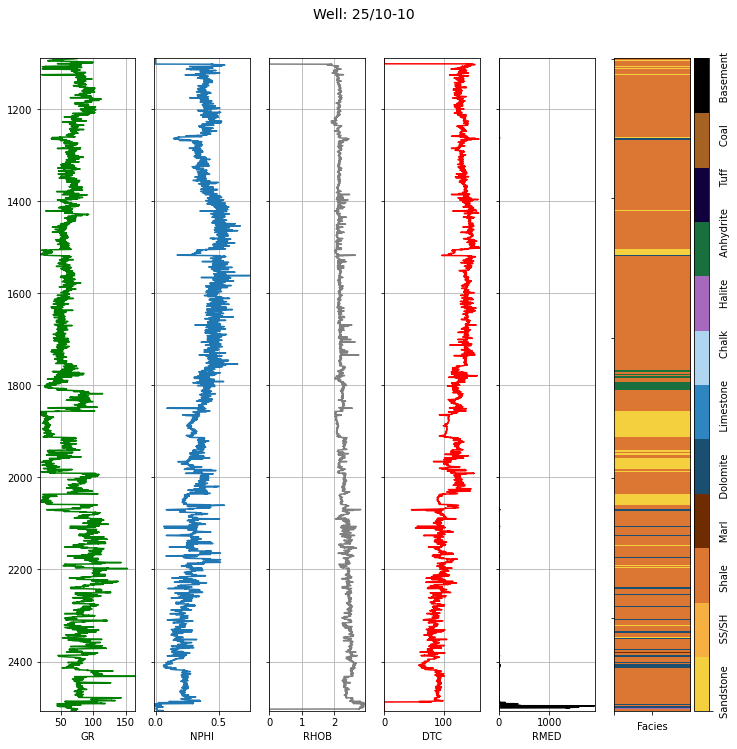

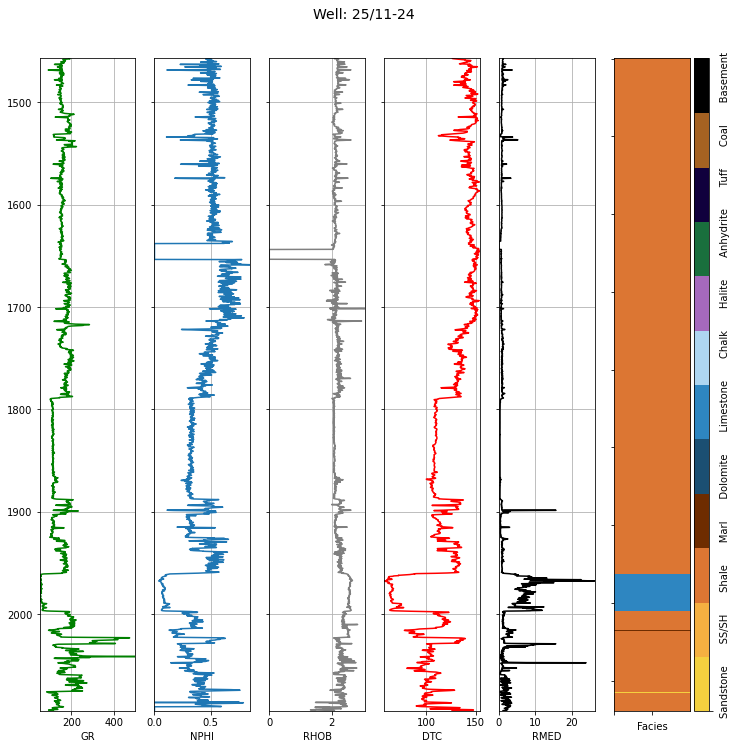

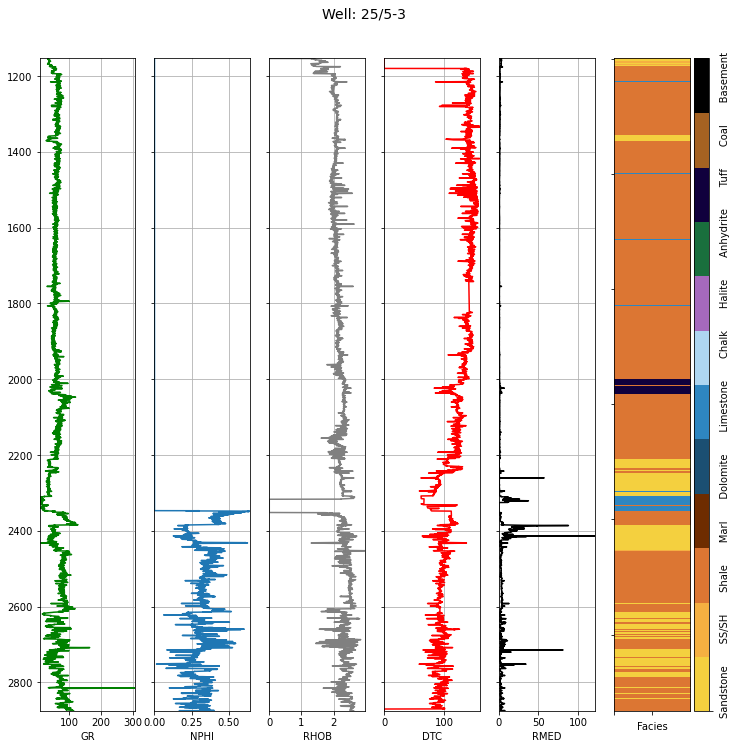

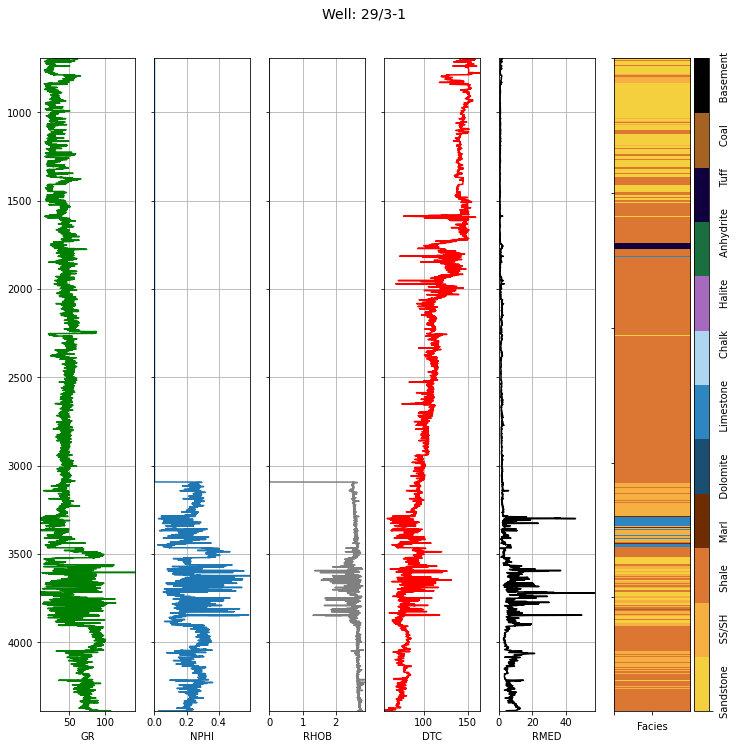

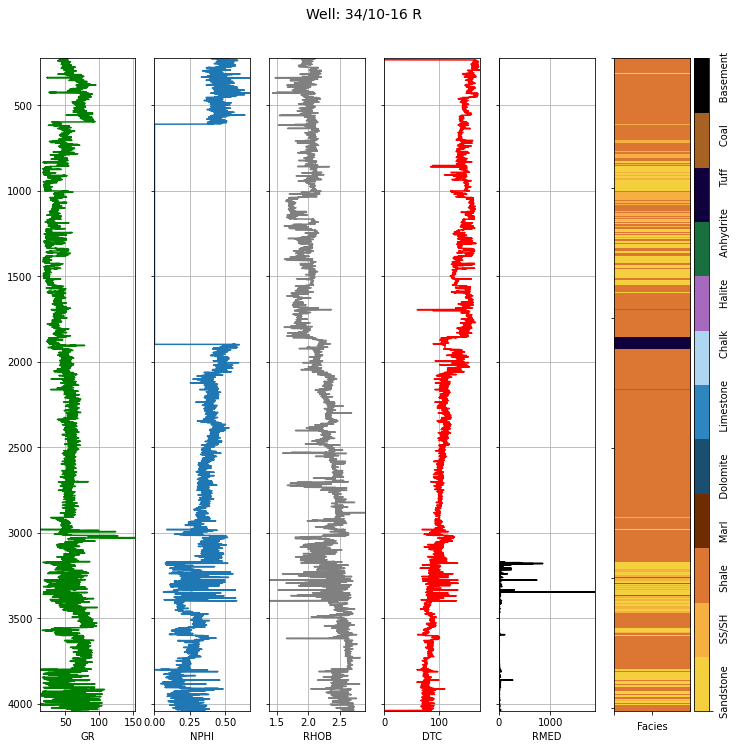

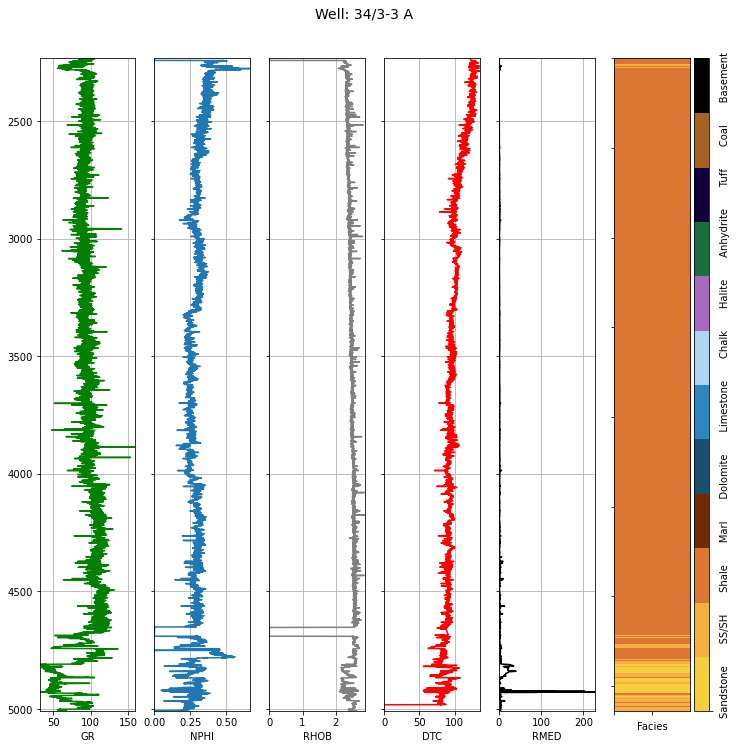

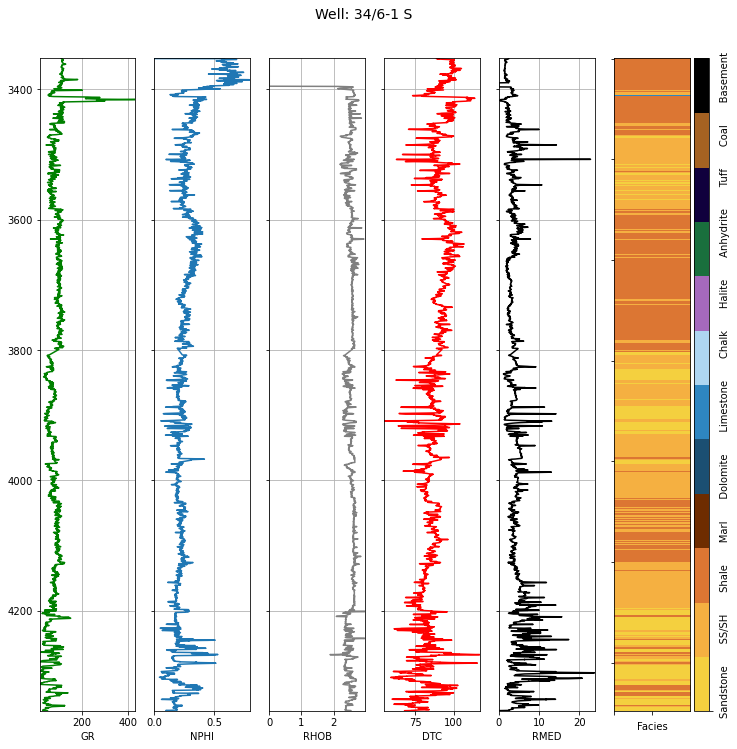

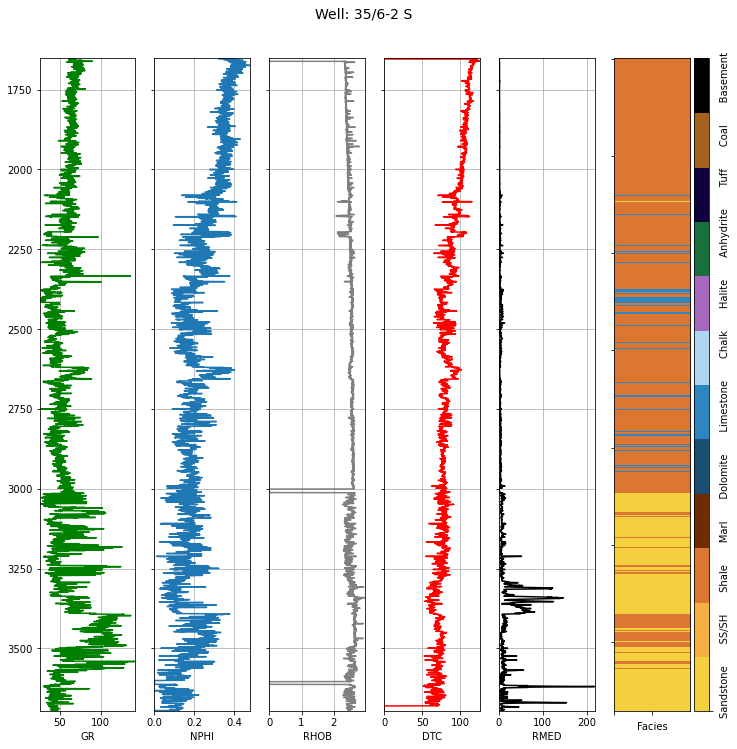

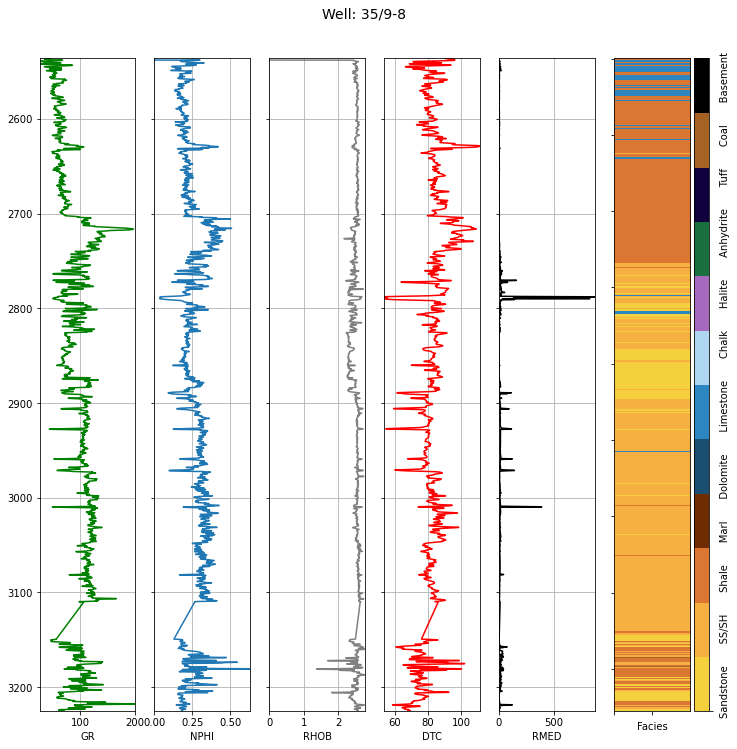

In [8]:
facies.plot_lithofacies(df, predictions, log1='GR', log2='NPHI', 
                        log3='RHOB', log4='DTC', log5='RMED', depth_col='DEPTH_MD')

Check accuracy of predictions

In [9]:
# preprocessing the actual target labels

lithology_numbers = {30000: 0,
                        65030: 1,
                        65000: 2,
                        80000: 3,
                        74000: 4,
                        70000: 5,
                        70032: 6,
                        88000: 7,
                        86000: 8,
                        99000: 9,
                        90000: 10,
                        93000: 11}

In [10]:
labels = pd.read_csv('leaderboard_test_target.csv.txt', sep=';')

labels = labels.FORCE_2020_LITHOFACIES_LITHOLOGY

labels = labels.map(lithology_numbers)

In [11]:
import sklearn.metrics as sklm

def show_evaluation(pred, true):
    
    print(f'Accuracy is: {round((sklm.accuracy_score(true, pred) * 100), 2)} %')
    print(f'F1 is: {round((sklm.f1_score(pred, true.values, average="weighted") * 100), 2)} %')

In [12]:
show_evaluation(predictions, labels)

Accuracy is: 79.29 %
F1 is: 81.55 %


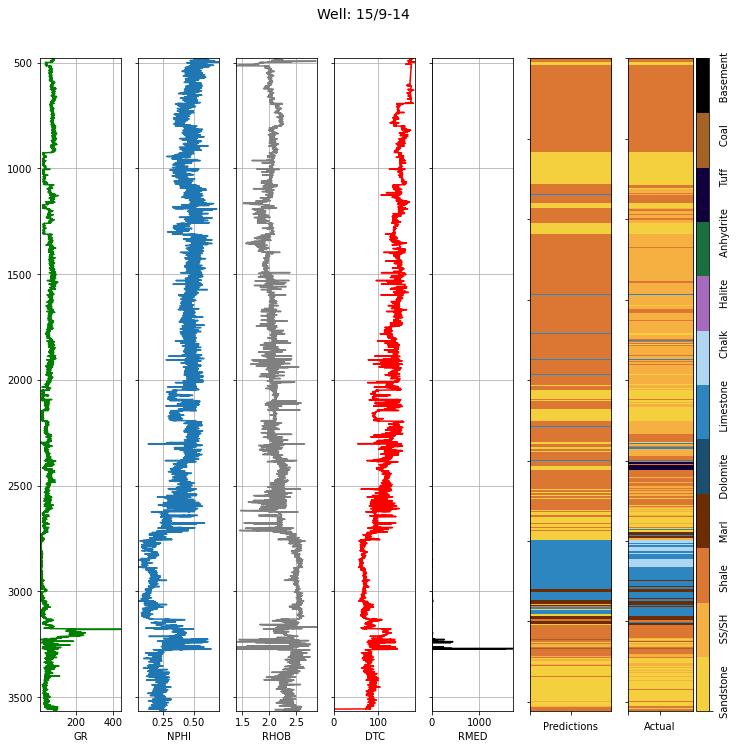

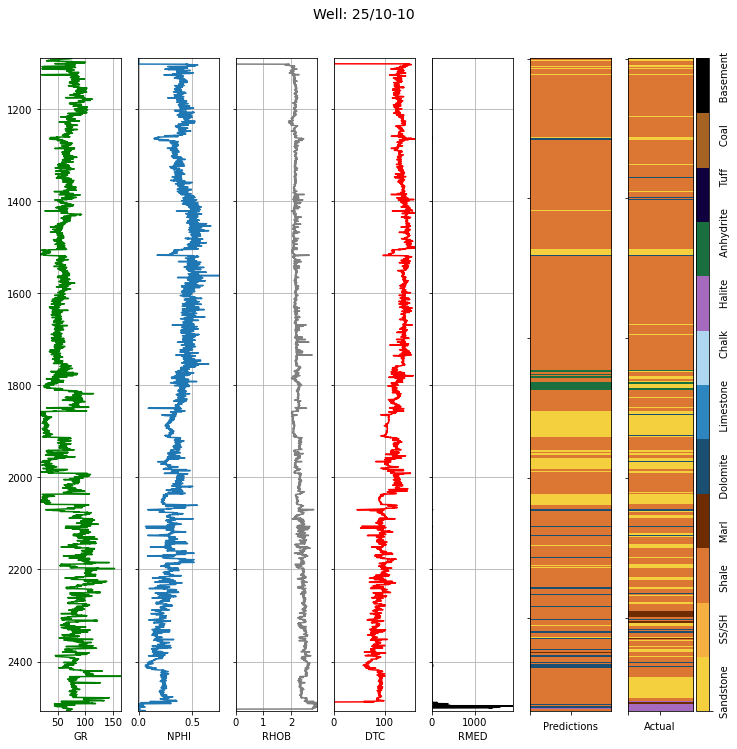

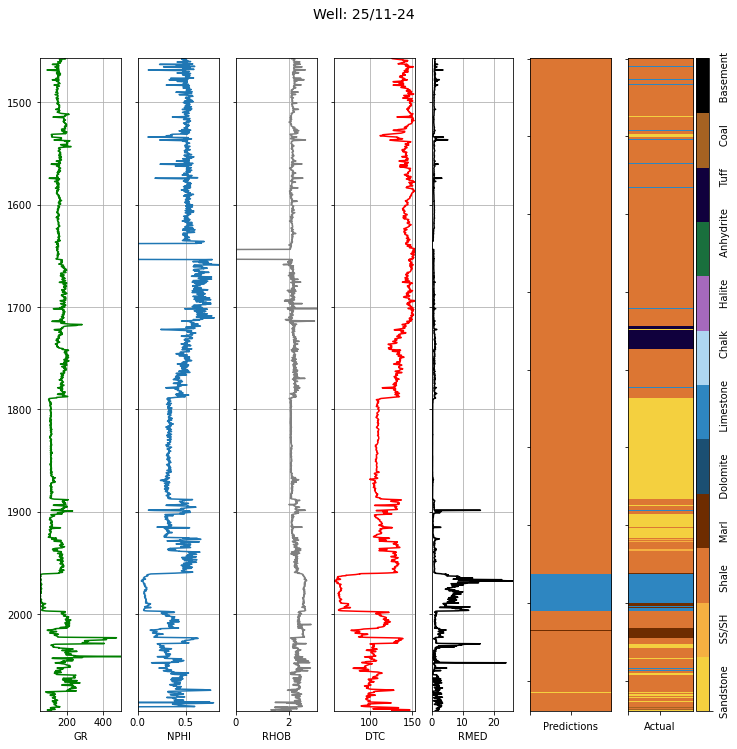

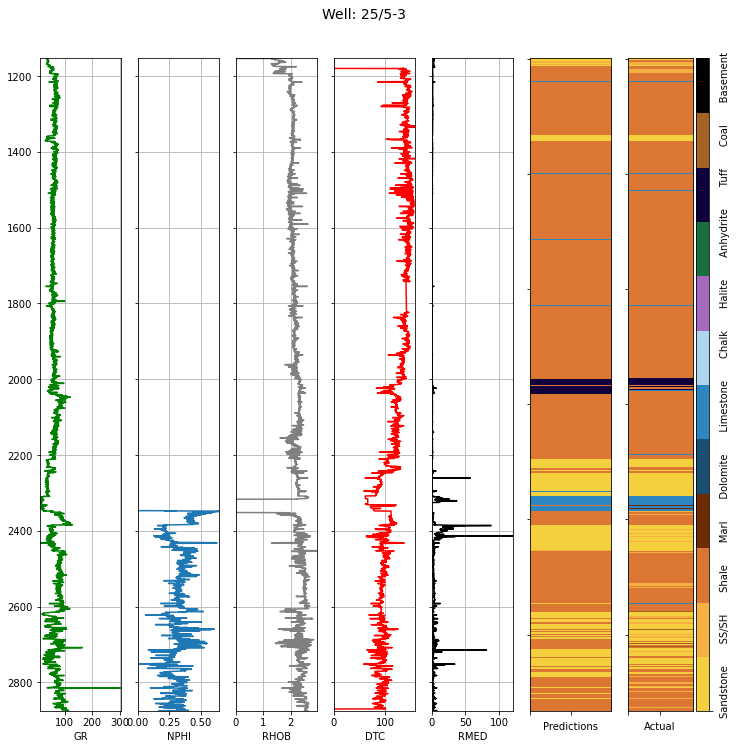

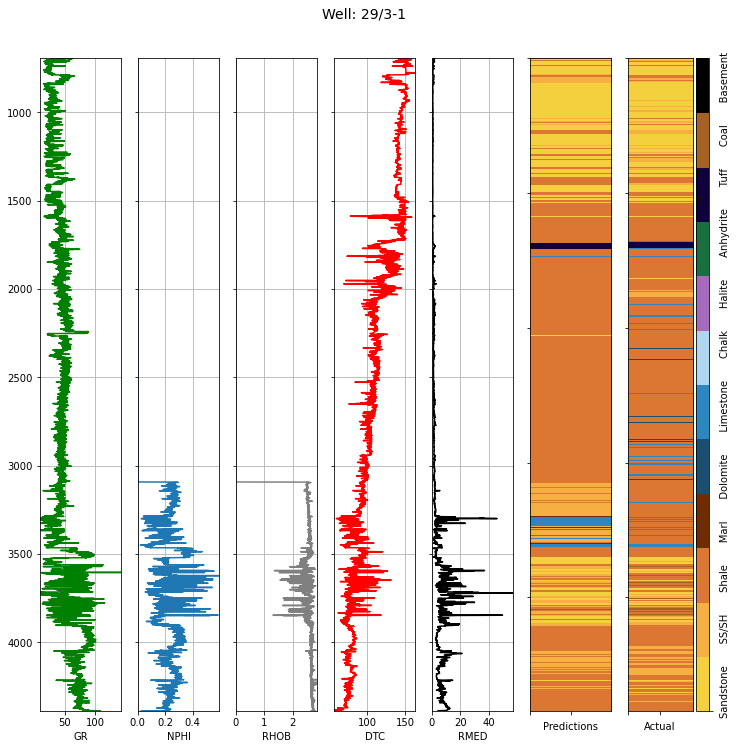

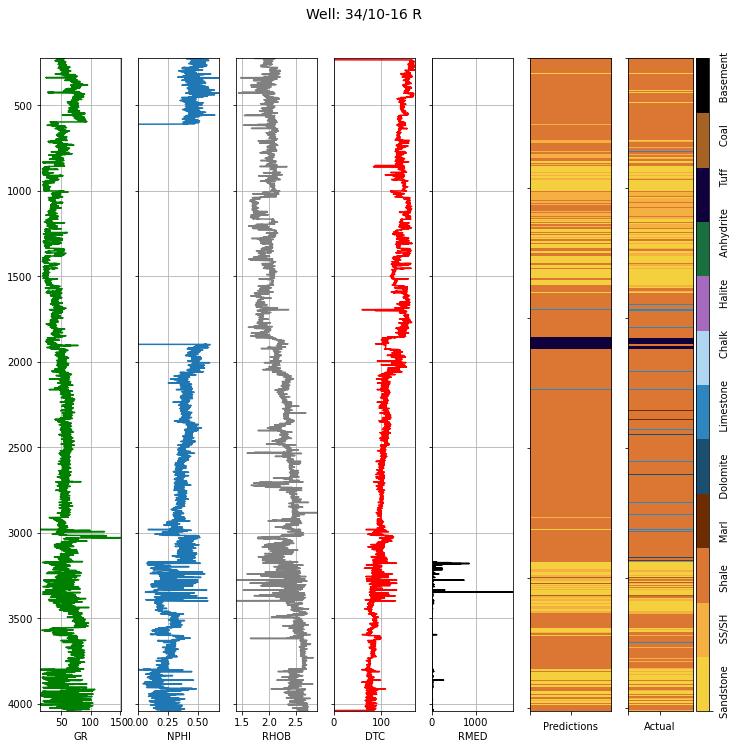

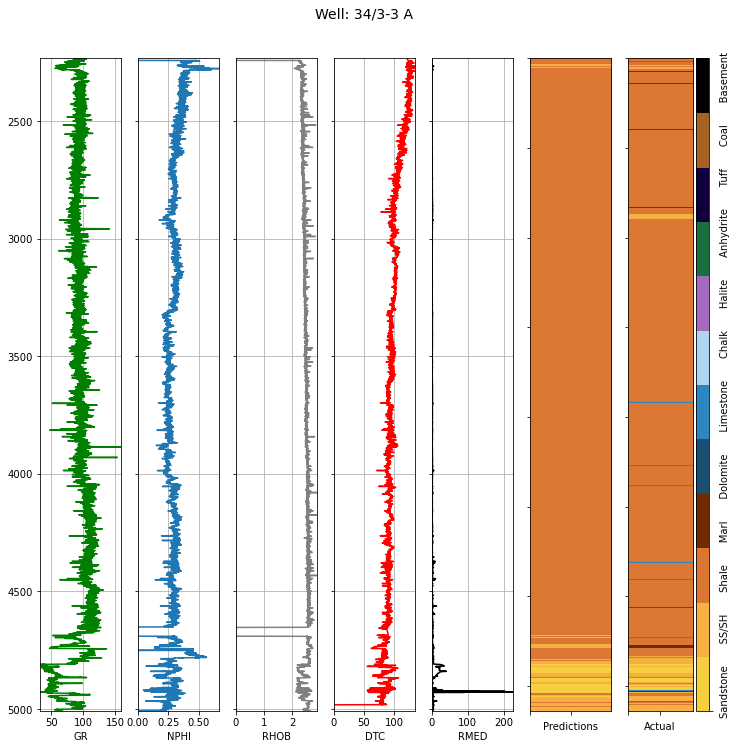

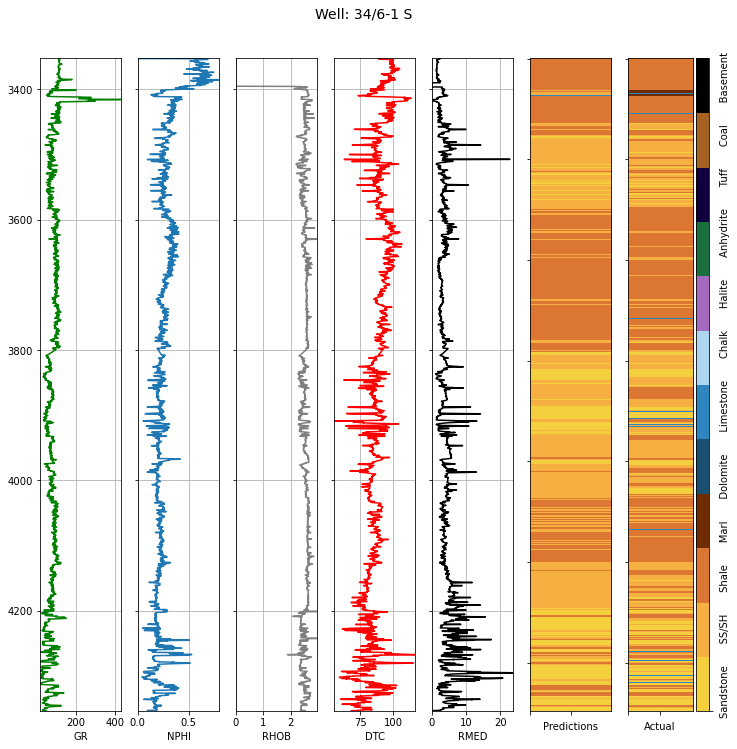

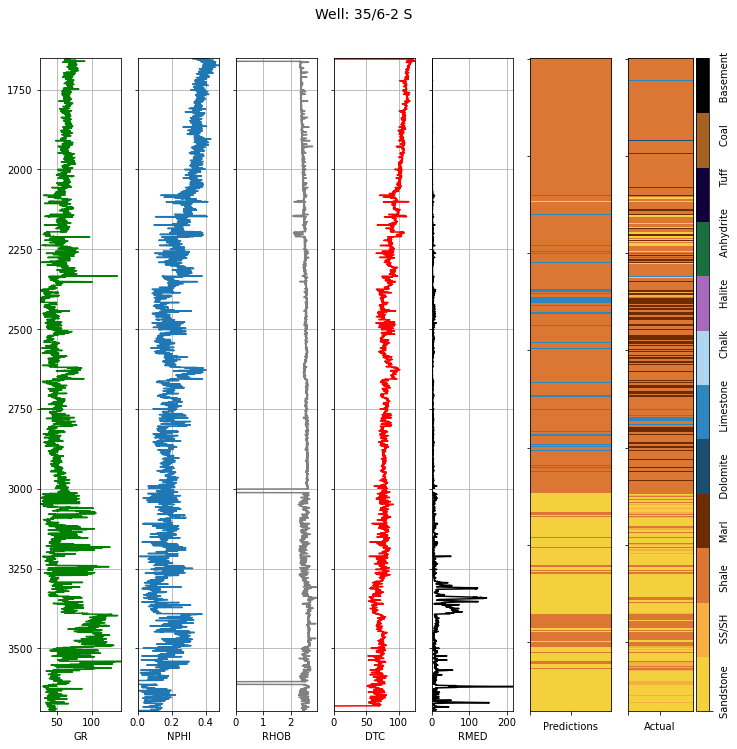

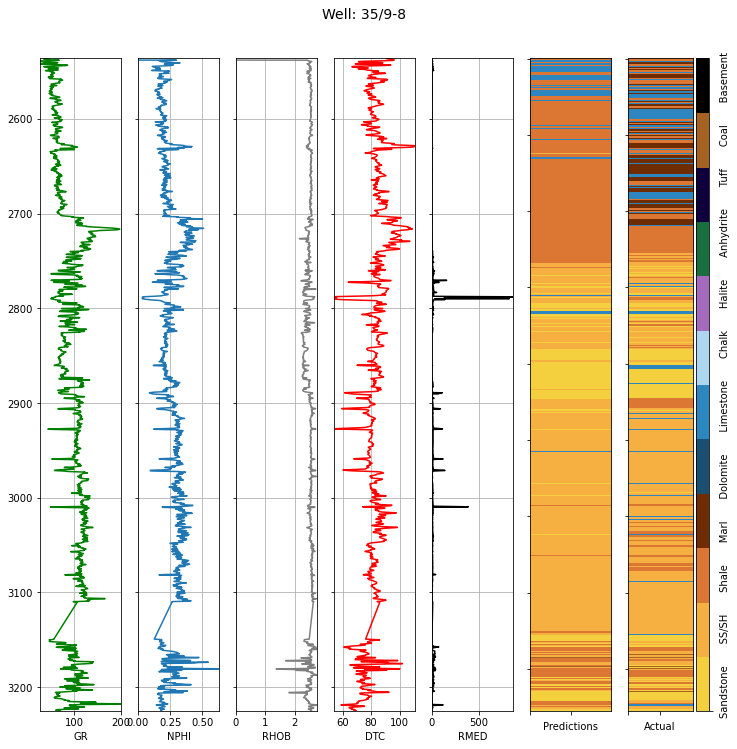

In [13]:
facies.compare_lithofacies(df=df, label=labels, predictions=predictions, log1='GR', log2='NPHI',
                           log3='RHOB', log4='DTC', log5='RMED', depth_col='DEPTH_MD')